# Implementar 1: Búsqueda manual del umbral

In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def get_sub_array(array, indexes):
    sub_array = []
    for index in indexes:
        sub_array.append(array[index])

    return sub_array

In [3]:
def divide_image(image, threshold):
    image_as_array = image.ravel()
    lower_values = []
    upper_values = []

    for value in image_as_array:
        if (value < threshold):
            lower_values.append(value)
        else:
            upper_values.append(value)

    return lower_values,upper_values

In [4]:
#Paso1: Definir umbral inicial (en general la media de la imagen)
def find_threshold(image, threshold = 128, delta = 1.0):
    
    #Paso2: Dividir la imagen en dos partes
    lower_values,upper_values = divide_image(image, threshold)

    #Paso3: Encontrar la media de cada parte
    lower_mean = np.mean(lower_values)
    upper_mean = np.mean(upper_values)

    #Paso4: Calcular el nuevo umbral (promedio entre media anterior y actual)
    new_threshold = np.mean([lower_mean, upper_mean])

    #Paso5: Criterio de detención (o recalculo)
    if abs(new_threshold - threshold) < delta:
        return new_threshold
    else:
        return find_threshold(image, new_threshold, delta)

In [5]:
original_image = cv.imread("Sombreado.png", cv.IMREAD_GRAYSCALE)

mean = np.mean(original_image)
manual_threshold = find_threshold(original_image, mean)

In [6]:
fixed_binarized_image = cv.threshold(original_image,
                                     manual_threshold, 255,
                                     cv.THRESH_BINARY)[1]

In [7]:
otsu_binarized_image = cv.threshold(original_image,
                                    manual_threshold, 255,
                                    cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

Original


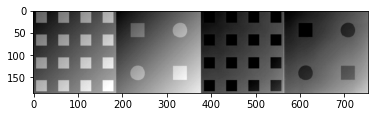

In [8]:
print("Original")
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.show()

Binarized - Fixed


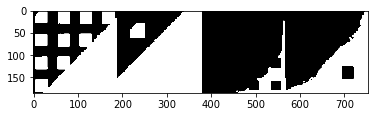

In [9]:
print("Binarized - Fixed")
plt.imshow(fixed_binarized_image, cmap='gray', vmin=0, vmax=1)
plt.show()

Binarized - Otsu


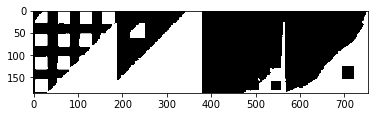

In [10]:
print("Binarized - Otsu")
plt.imshow(otsu_binarized_image, cmap='gray', vmin=0, vmax=1)
plt.show()

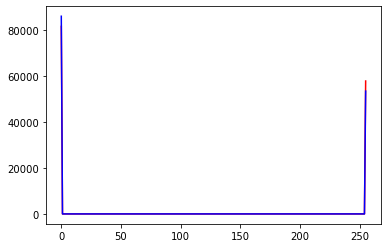

In [11]:
fig = plt.figure()

hist1,bins1 = np.histogram(fixed_binarized_image.ravel(),256,[0,256])
plt.plot(hist1, 'r')

hist2,bins2 = np.histogram(otsu_binarized_image.ravel(),256,[0,256])
plt.plot(hist2, 'b')


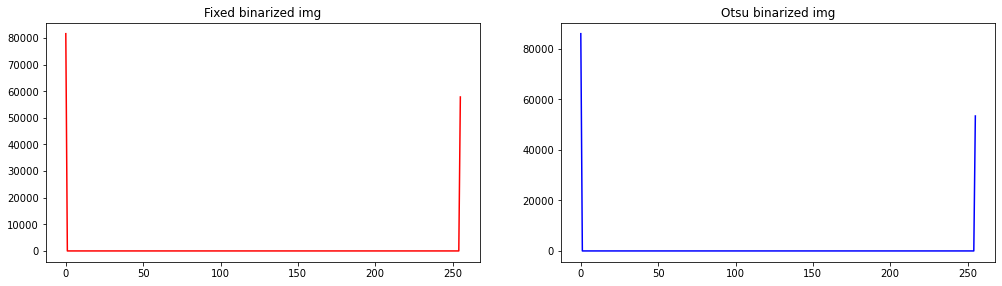

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=5.0)

ax1.set_title('Fixed binarized img')
ax1.plot(hist1, 'r')

ax2.set_title('Otsu binarized img')
ax2.plot(hist2, 'b')